In [31]:
import torch
import numpy as np
import matplotlib.pyplot as plt

# high quality plots
plt.rcParams['figure.dpi'] = 300

# check if CUDA is available (and what version)
torch.cuda.is_available()
torch.version.cuda

# set device to GPU if available, otherwise use CPU
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cuda')

### Training a first model with `PyTorch`

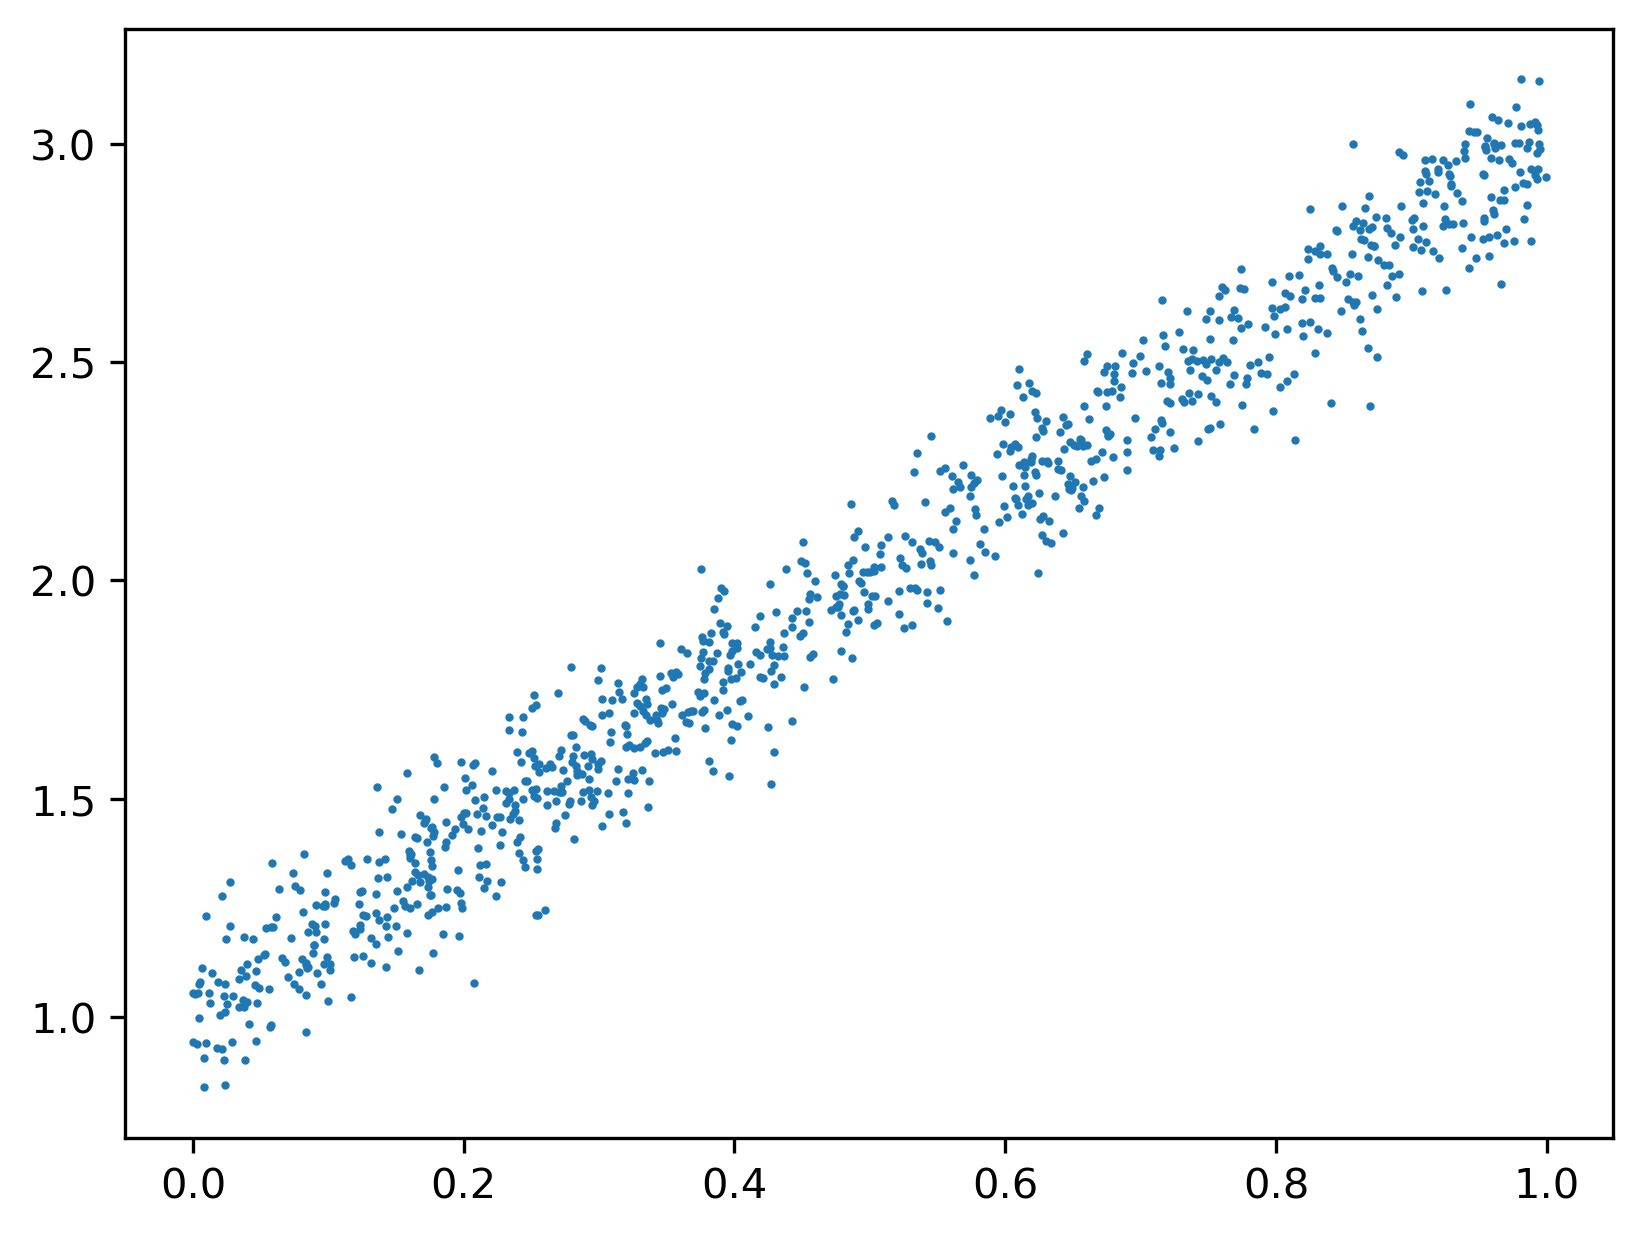

In [32]:
# create some data (line with noise) in numpy 
Npoints = 1000
x = np.random.rand(Npoints, 1)
y = 2*x + 1 + 0.1*np.random.randn(Npoints, 1)

# visualize the data
plt.scatter(x, y, s=1)

In [12]:
# convert data to torch tensors
x_tensor = torch.from_numpy(x).float().to(device)
y_tensor = torch.from_numpy(y).float().to(device)

# train-test split
Ntrain = int(0.8*Npoints)
x_train = x_tensor[:Ntrain]
y_train = y_tensor[:Ntrain]

x_test = x_tensor[Ntrain:]
y_test = y_tensor[Ntrain:]

# define the model
class LinearRegression(torch.nn.Module):
    def __init__(self):
        super(LinearRegression, self).__init__()
        self.linear = torch.nn.Linear(1, 1)
        
    def forward(self, x):
        return self.linear(x)

In [19]:
# instantiate the model
model = LinearRegression().to(device)

# define the loss function
criterion = torch.nn.MSELoss()

# define the optimizer
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

# train the model
Nepochs = 10000

# initialize the loss array
losses = []

for epoch in range(Nepochs):
    # forward pass
    y_pred = model(x_train)
    
    # compute the loss
    loss = criterion(y_pred, y_train)
    
    # zero the gradients
    optimizer.zero_grad()
    
    # backward pass
    loss.backward()
    
    # update the weights
    optimizer.step()
    
    # if epoch % 100 == 0:
    #     print(f'Epoch {epoch}, loss {loss.item()}')

    # note the loss 
    losses.append(loss.item())

# evaluate the model
model.eval()
y_pred = model(x_test)

Text(0, 0.5, 'Loss')

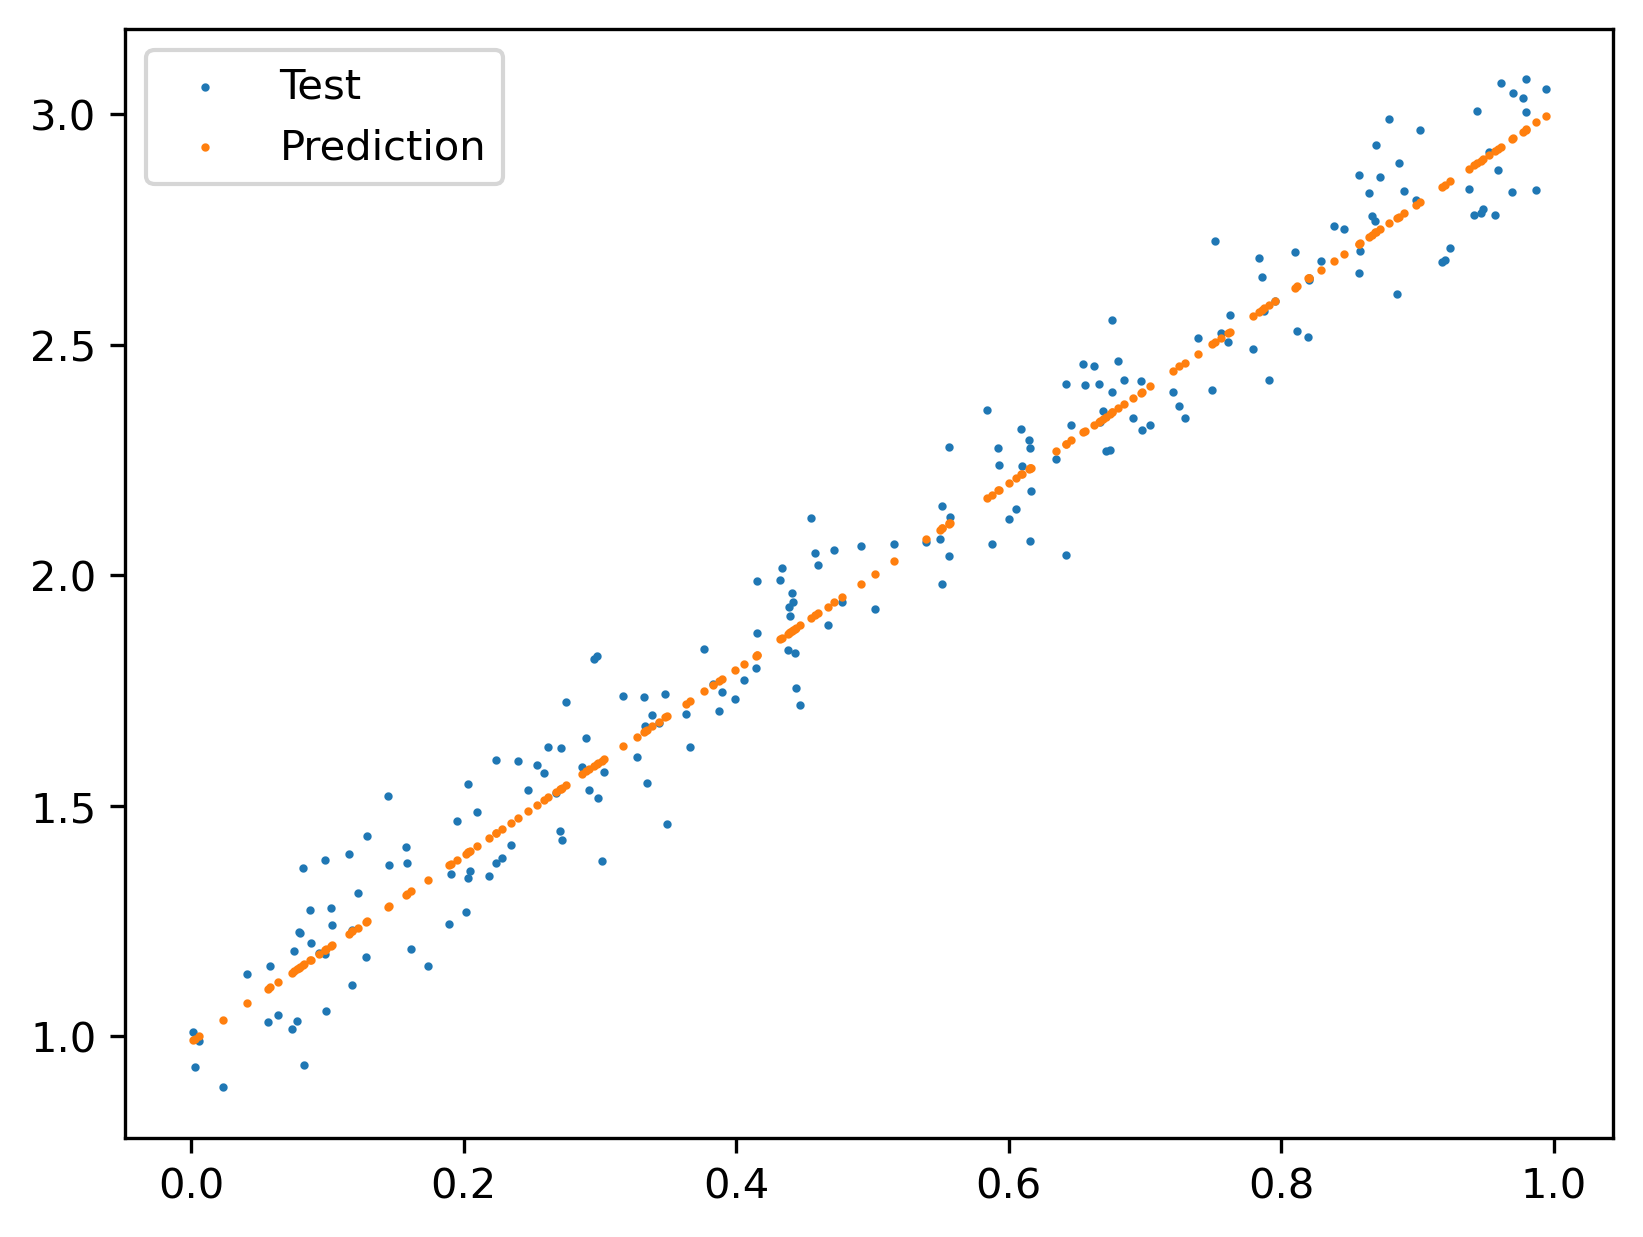

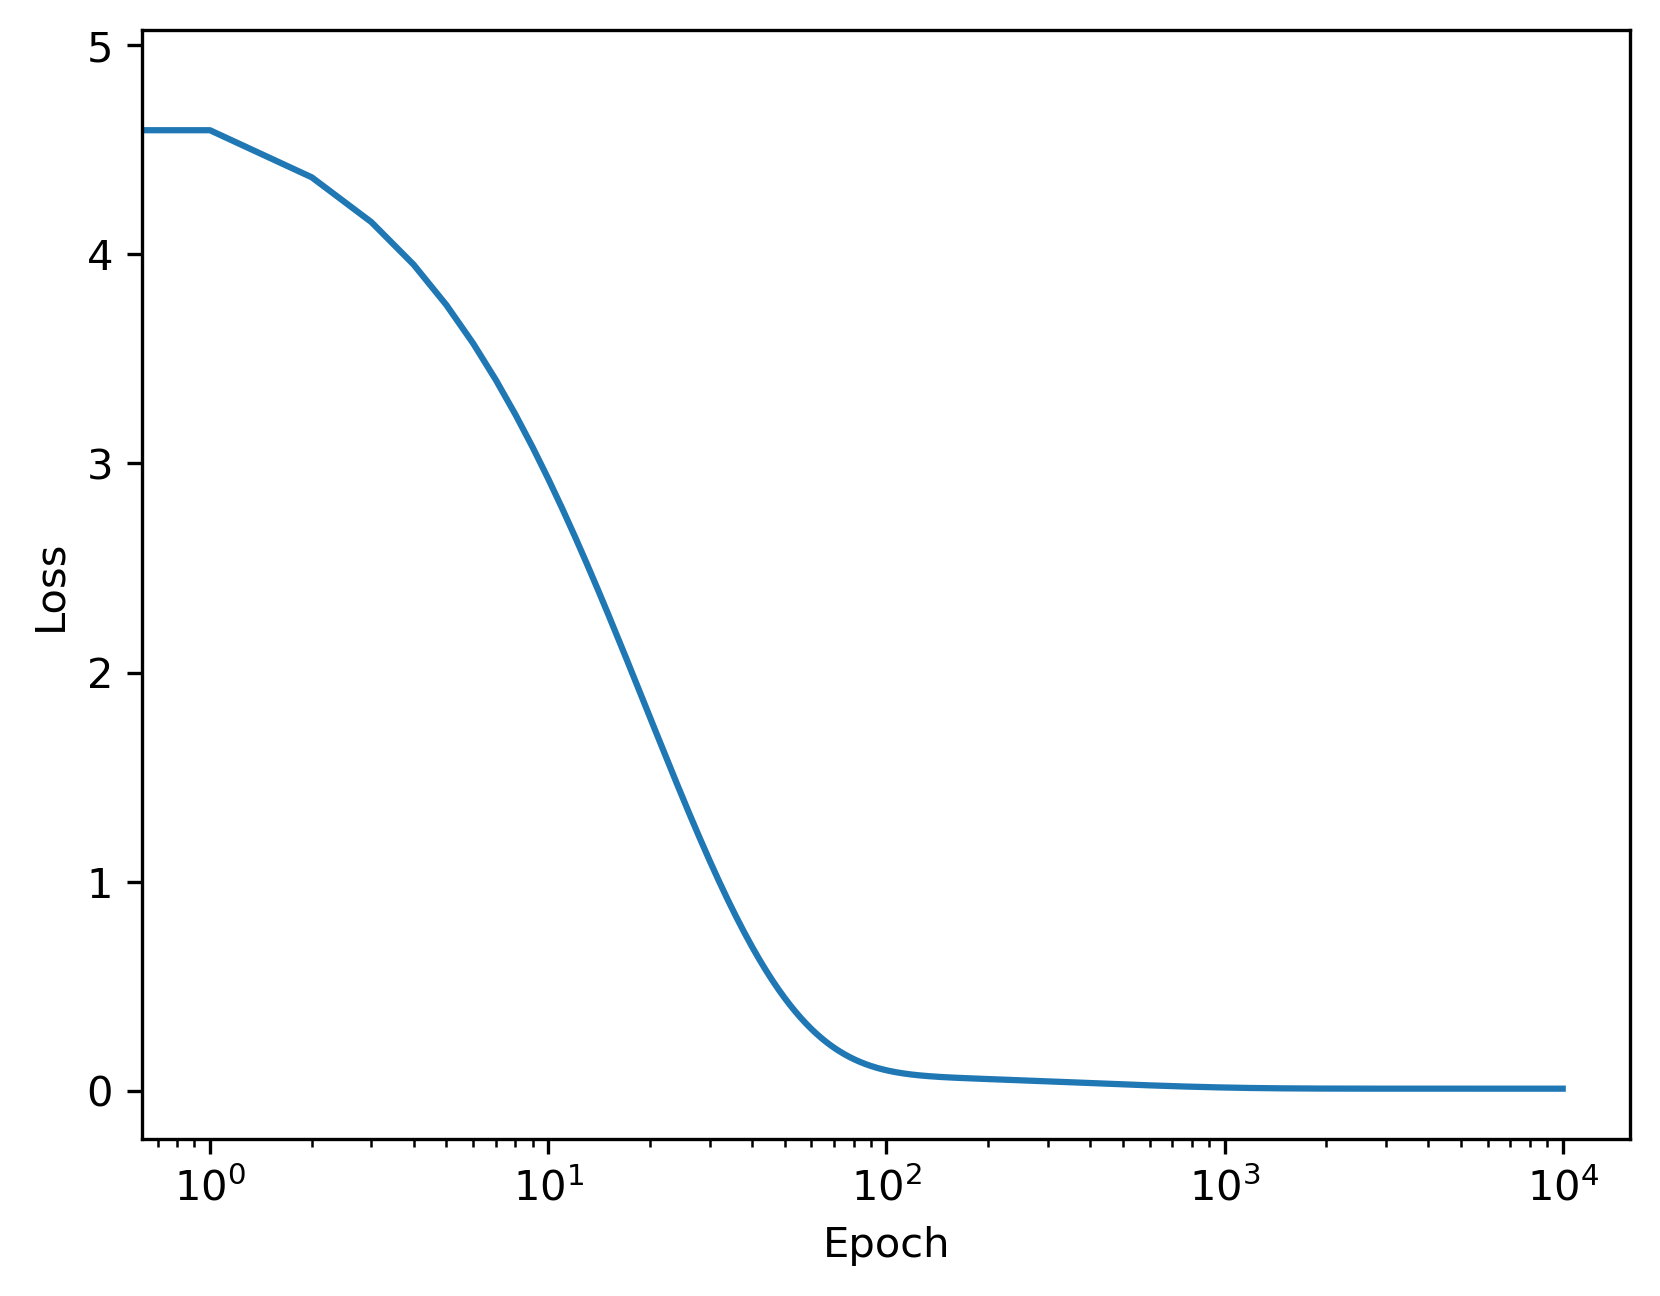

In [37]:
# visualize the results
plt.scatter(x_test.cpu().numpy(), y_test.cpu().numpy(), s=1, label='Test')
plt.scatter(x_test.cpu().numpy(), y_pred.cpu().detach().numpy(), s=1, label='Prediction')
plt.legend()

# visualize the loss over time in seperate figure
plt.figure()
plt.plot(losses)
plt.xscale('log')
plt.xlabel('Epoch')
plt.ylabel('Loss')